In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time
import sys
sys.path.append("..")
sys.path.append("../development")
from RPLB_acc_NoSTC import RPLB_acc_NoSTC
from RPLB_acc_anySTC import RPLB_acc_anySTC
from RPLB_acc_NoSTC_arbitrary import RPLB_acc_NoSTC_arbitrary
from RPLB_acc_anySTC_arbitrary import RPLB_acc_anySTC_arbitrary

In [2]:
# initialize constants (SI units)
c = 2.99792458e8 #speed of light
m_e = 9.10938356e-31
q_e = 1.60217662e-19
e_0 = 8.85418782e-12
# set pure spectral properties
lambda_0 = 800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0
k_0 = omega_0/c
tau_0 = 10e-15  # FL pulse duration 1/e2 intensity half-width (same def as beam waist)
a = 125/k_0
w_0 = np.sqrt(2)*np.sqrt(np.sqrt(1+(a*k_0)**2)-1)/k_0
print(w_0)
print(np.sqrt(2*a/k_0))
# calculate Rayleigh range
z_R = np.pi*w_0**2/lambda_0
# beam power
P = 10e12
# spectral phase
GDD = 0.0*(1e-15)**2
TOD = 0.0*(1e-15)**3
# intial electron velocity
beta_0 = 0
# set tuning parameters
t_0 = -10*tau_0
z_0 = 0.0
Psi_0 = np.pi

curv = 0.0
spher = 0.0
spher2 = 0.0
spher3 = 0.0

PM = np.zeros(shape=(5, 5))
PM[0,0] = Psi_0
PM[2,0] = GDD
PM[3,0] = TOD

2.0051319796881284e-06
2.0131684841794813e-06


In [3]:
start = time.time()
time0, z0, beta0, KE0 = RPLB_acc_NoSTC(lambda_0, tau_0, w_0, P, Psi_0, GDD, t_0, z_0, beta_0)
middle = time.time()
time2, z2, beta2, KE2 = RPLB_acc_NoSTC_arbitrary(lambda_0, tau_0, a, P, Psi_0, GDD, t_0, z_0, beta_0, curv, spher, spher2, spher3)
end = time.time()
#time3, z3, beta3, KE3 = RPLB_acc_anySTC_arbitrary(lambda_0, tau_0, a, P, PM, t_0, z_0, beta_0)
#end2 = time.time()

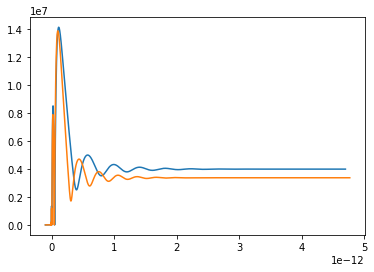

In [4]:
plt.plot(time0, KE0)
plt.plot(time2, KE2)
#plt.plot(time3, KE3)

In [5]:
print(middle-start)
print(end-middle)
#print(end2-end)

2.5117061138153076
4.657535552978516


In [6]:
PM

array([[3.14159265, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [7]:
time4, z4, beta4, KE4 = RPLB_acc_anySTC(lambda_0, tau_0, w_0, P, Psi_0, np.array([0.0, 0.0]), np.array([0.0, 0.0]), np.array([0.0]), t_0, z_0, beta_0)

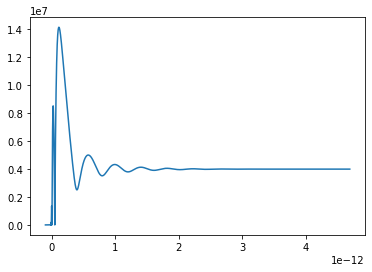

In [8]:
plt.plot(time4, KE4)